#                          Predictive analysis of customer subscription status.


#### In this project we are going to find out the subscription status of customer for a particular supermarket based on the attributes and correlations in them.We are going to conduct EDA and analyse our dataset. We are going to predict the status of customer by best suitable Machine learning model

we are going to follow the below approach to achieve this pr;oject.
1. The problem defintion
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

### The problem defintion
Given shopping parmeters of a customer and we need to predict whether the customer is subscribed to the supermarket or not

### Data
The original data is taken from Kaggle   link: https://www.kaggle.com/datasets/iamsouravbanerjee/customer-shopping-trends-dataset?resource=download

### Evaluation
Achieving atleat 85% accuracy in predicting the right status of the customer subscription

### Features 
1. Customer ID - Unique identifier for each customer
2. Age - Age of the customer
3. Gender - Gender of the customer (Male/Female)
4. Item Purchased - The item purchased by the customer
5. Category - Category of the item purchased
6. Purchase Amount (USD) - The amount of the purchase in USD
7. Location - Location where the purchase was made
8. Size - Size of the purchased item
9. Color - Color of the purchased item
10. Season - Season during which the purchase was made
11. Review Rating - Rating given by the customer for the purchased item
12. Shipping Type - Type of shipping chosen by the customer
13. Discount Applied - Indicates if a discount was applied to the purchase (Yes/No)
14. Promo Code Used - Indicates if a promo code was used for the purchase (Yes/No)
15. Previous Purchases - The total count of transactions concluded by the customer at the store, excluding the ongoing transaction
16. Payment Method - Customer's most preferred payment method
17. Frequency of Purchases - Frequency at which the customer makes purchases (e.g., Weekly, Fortnightly, Monthly)
18. Subscription Status - Indicates if the customer has a subscription (Yes/No)
 Fortnightly, Monthly)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [2]:
data=pd.read_csv(r'C:\Users\91950\Desktop\shopping_data.csv')
data

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Subscription Status
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Express,Yes,Yes,14,Venmo,Fortnightly,Yes
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Express,Yes,Yes,2,Cash,Fortnightly,Yes
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Free Shipping,Yes,Yes,23,Credit Card,Weekly,Yes
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Next Day Air,Yes,Yes,49,PayPal,Weekly,Yes
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Free Shipping,Yes,Yes,31,PayPal,Annually,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,2-Day Shipping,No,No,32,Venmo,Weekly,No
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly,No
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,Standard,No,No,24,Venmo,Quarterly,No
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,Express,No,No,24,Venmo,Weekly,No


In [3]:
data.isna().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
Subscription Status       0
dtype: int64

In [4]:
data.drop_duplicates()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Subscription Status
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Express,Yes,Yes,14,Venmo,Fortnightly,Yes
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Express,Yes,Yes,2,Cash,Fortnightly,Yes
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Free Shipping,Yes,Yes,23,Credit Card,Weekly,Yes
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Next Day Air,Yes,Yes,49,PayPal,Weekly,Yes
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Free Shipping,Yes,Yes,31,PayPal,Annually,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,2-Day Shipping,No,No,32,Venmo,Weekly,No
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly,No
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,Standard,No,No,24,Venmo,Quarterly,No
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,Express,No,No,24,Venmo,Weekly,No


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Shipping Type           3900 non-null   object 
 12  Discount Applied        3900 non-null   object 
 13  Promo Code Used         3900 non-null   object 
 14  Previous Purchases      3900 non-null   

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Shipping Type           3900 non-null   object 
 12  Discount Applied        3900 non-null   object 
 13  Promo Code Used         3900 non-null   object 
 14  Previous Purchases      3900 non-null   

In [7]:
data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Subscription Status
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Express,Yes,Yes,14,Venmo,Fortnightly,Yes
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Express,Yes,Yes,2,Cash,Fortnightly,Yes
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Free Shipping,Yes,Yes,23,Credit Card,Weekly,Yes
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Next Day Air,Yes,Yes,49,PayPal,Weekly,Yes
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Free Shipping,Yes,Yes,31,PayPal,Annually,Yes


In [8]:
data.tail()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Subscription Status
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,2-Day Shipping,No,No,32,Venmo,Weekly,No
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly,No
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,Standard,No,No,24,Venmo,Quarterly,No
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,Express,No,No,24,Venmo,Weekly,No
3899,3900,52,Female,Handbag,Accessories,81,California,M,Beige,Spring,3.1,Store Pickup,No,No,33,Venmo,Quarterly,No


In [9]:
data.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


## Exploratory data analysis(EDA]

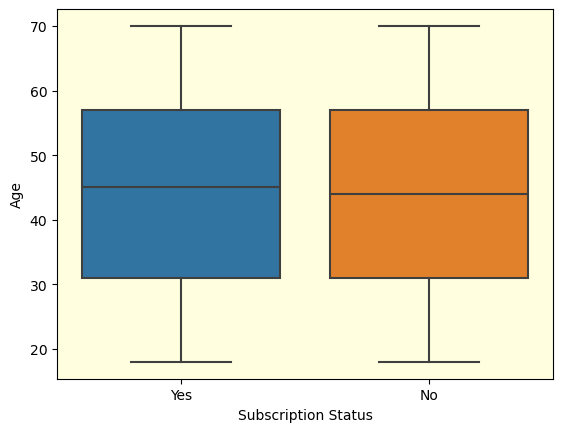

In [10]:
sns.boxplot(x="Subscription Status",y="Age",data=data)
plt.gca().set_facecolor("lightyellow")
plt.show()

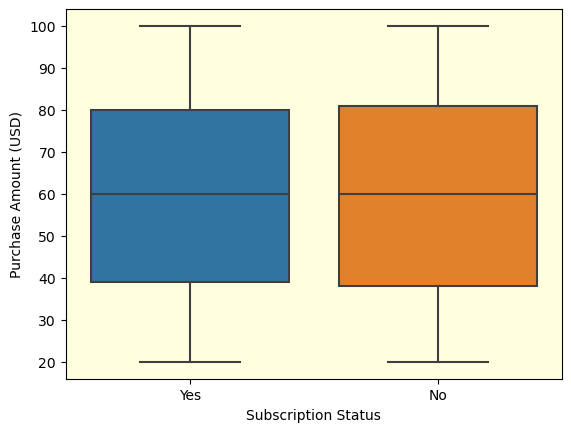

In [11]:
sns.boxplot(x="Subscription Status", y="Purchase Amount (USD)", data=data)
plt.gca().set_facecolor("lightyellow")
plt.show()

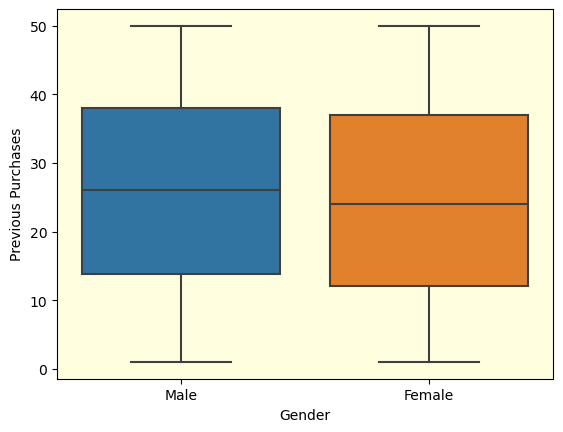

In [12]:
sns.boxplot(x="Gender",y="Previous Purchases",data=data)
plt.gca().set_facecolor("lightyellow")
plt.show()

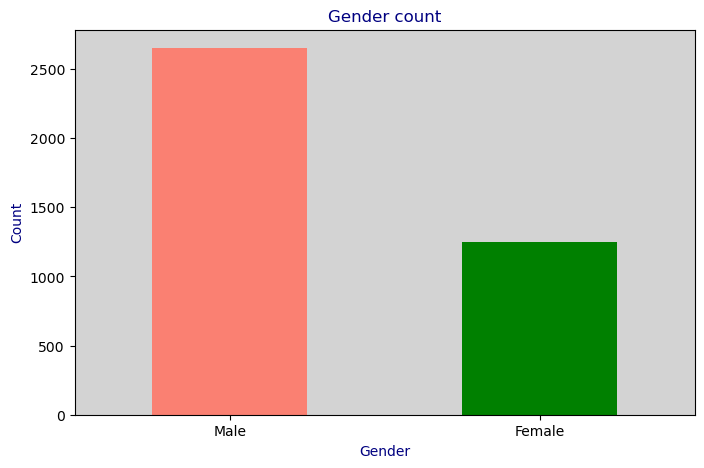

In [13]:
plt.figure(figsize=(8,5))
data["Gender"].value_counts().plot(kind="bar",color=["salmon","green"])
plt.xlabel("Gender",color="navy")
plt.ylabel("Count",color="navy")
plt.xticks(rotation=0)
plt.gca().set_facecolor("lightgrey")
plt.title("Gender count",color="navy")
plt.show()

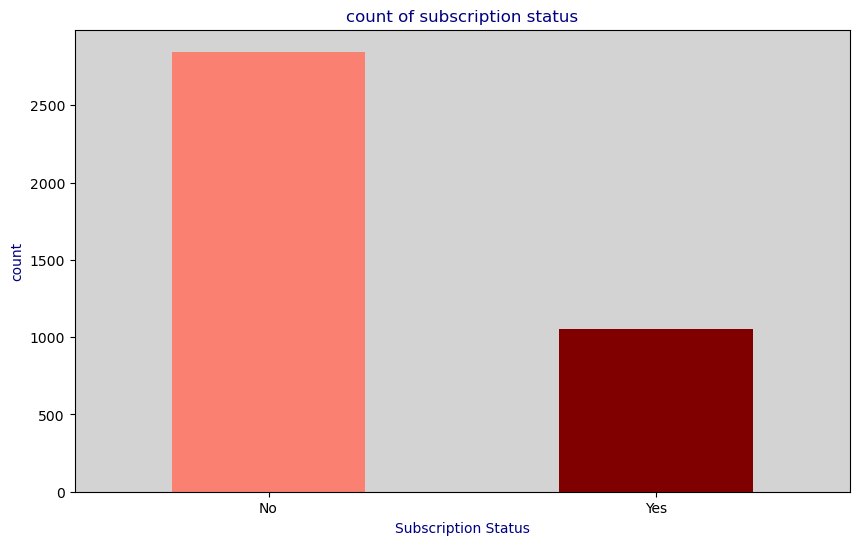

In [14]:
data["Subscription Status"].value_counts().plot(kind="bar",color=["Salmon","maroon"],figsize=(10,6))
plt.xlabel("Subscription Status",color="navy")
plt.ylabel("count",color="navy")
plt.title("count of subscription status",color="Navy")
plt.xticks(rotation=0)
plt.gca().set_facecolor("lightgrey")
plt.show()

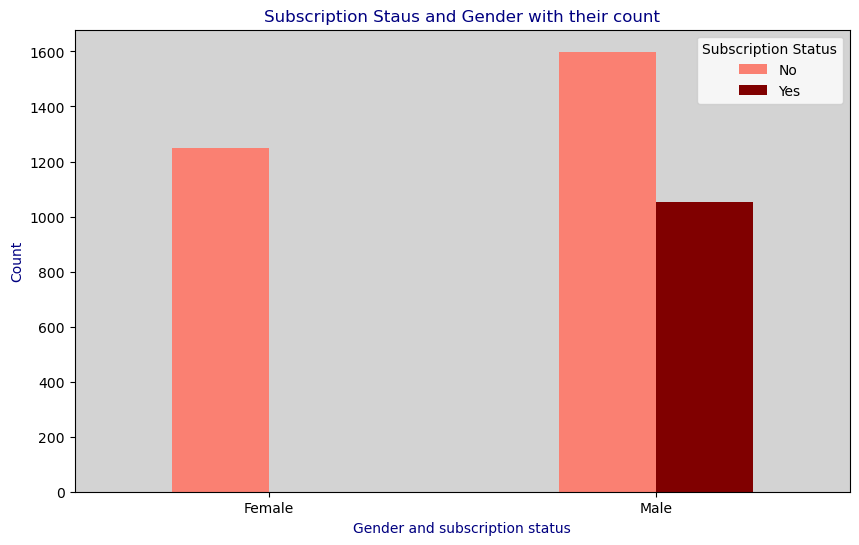

In [15]:
pd.crosstab(data["Gender"],data["Subscription Status"]).plot(kind="bar",color=["Salmon","maroon"],figsize=(10,6))
plt.xlabel("Gender and subscription status",color="navy")
plt.ylabel("Count",color="navy")
plt.xticks(rotation=0)
plt.title("Subscription Staus and Gender with their count",color="navy")
plt.gca().set_facecolor("lightgrey")
plt.show()

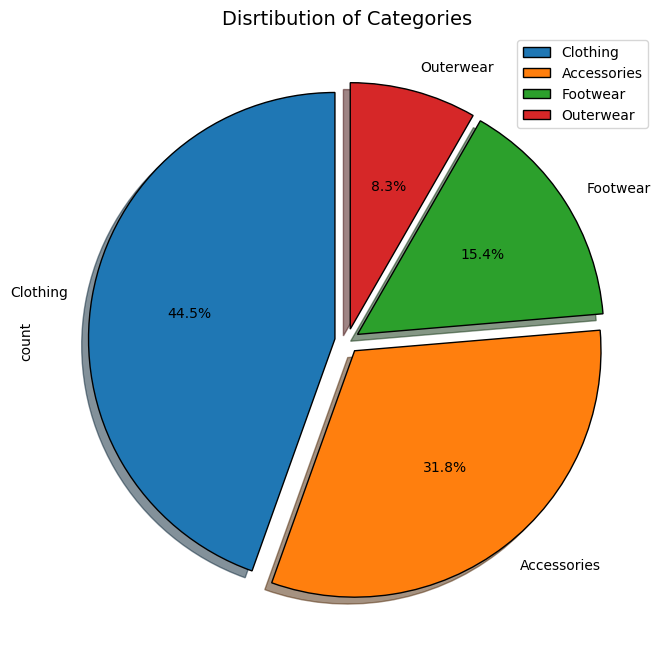

In [16]:
data["Category"].value_counts().plot(kind="pie",autopct='%1.1f%%',startangle=90,shadow=True,figsize=(8,8),explode=[0.05]*data['Category'].nunique(),wedgeprops={'linewidth': 1, 'edgecolor': 'black'})
plt.legend(loc="upper right")
plt.title("Disrtibution of Categories",fontsize=14)
plt.show()

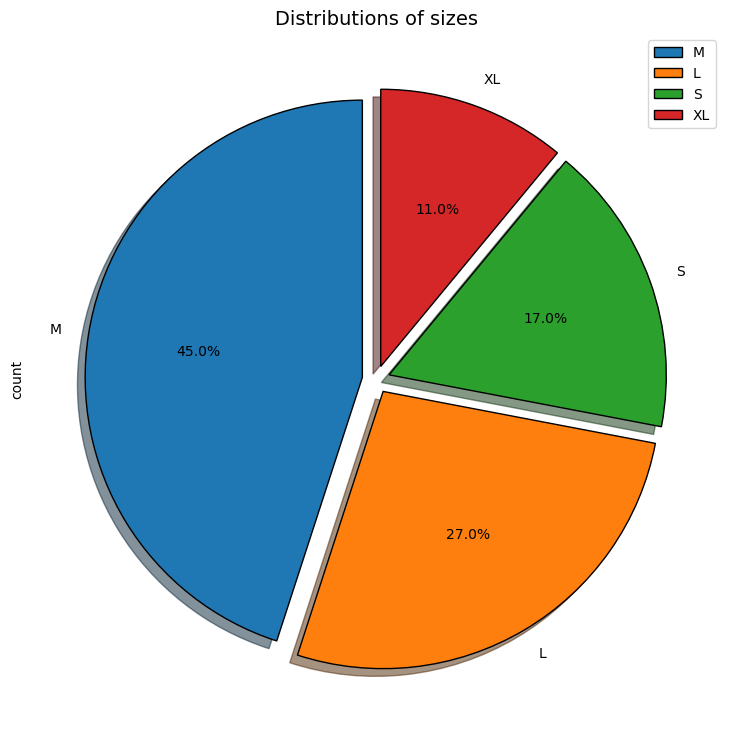

In [17]:
data["Size"].value_counts().plot(kind="pie",autopct='%1.1f%%',startangle=90,shadow=True,figsize=(9,9),explode=[0.05]*data['Size'].nunique(),wedgeprops={'linewidth': 1, 'edgecolor': 'black'})
plt.title("Distributions of sizes",fontsize=14)
plt.legend(loc="upper right")
plt.show()


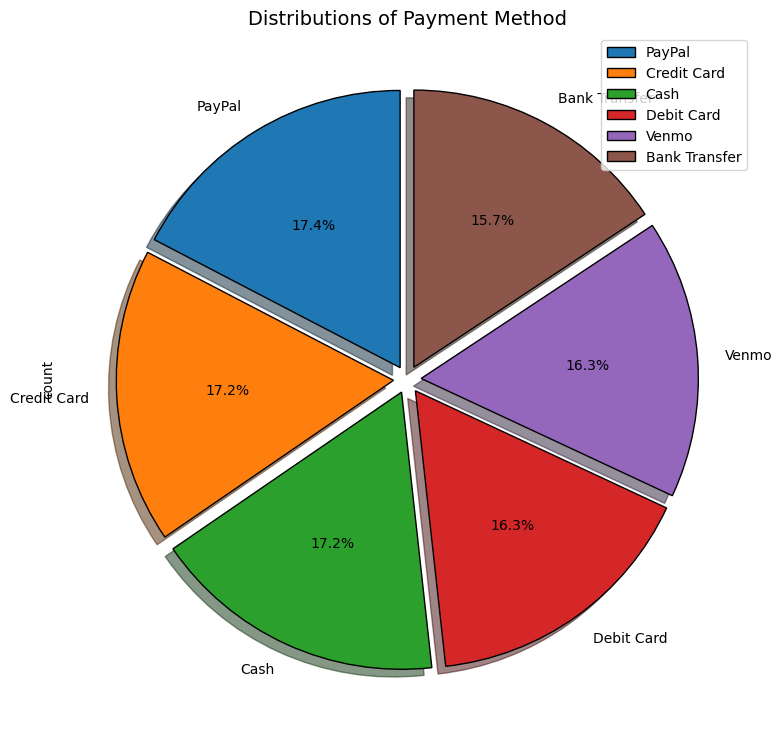

In [18]:
data["Payment Method"].value_counts().plot(kind="pie",autopct='%1.1f%%',startangle=90,shadow=True,figsize=(9,9),explode=[0.05]*data['Payment Method'].nunique(),wedgeprops={'linewidth': 1, 'edgecolor': 'black'})
plt.title("Distributions of Payment Method",fontsize=14)
plt.legend(loc="upper right")
plt.show()

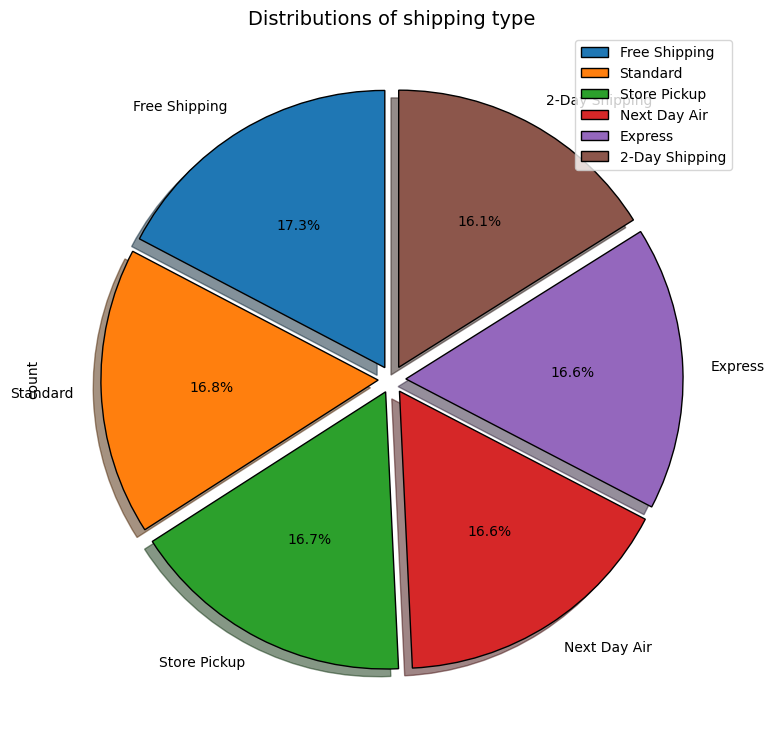

In [19]:
data["Shipping Type"].value_counts().plot(kind="pie",autopct='%1.1f%%',startangle=90,shadow=True,figsize=(9,9),explode=[0.05]*data['Shipping Type'].nunique(),wedgeprops={'linewidth': 1, 'edgecolor': 'black'})
plt.title("Distributions of shipping type",fontsize=14)
plt.legend(loc="upper right")
plt.show()

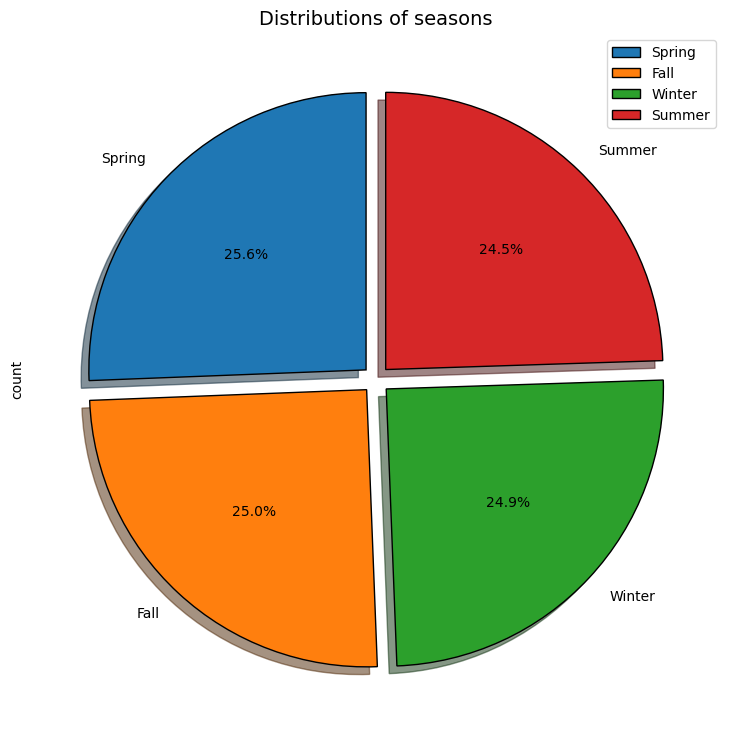

In [20]:
data["Season"].value_counts().plot(kind="pie",autopct='%1.1f%%',startangle=90,shadow=True,figsize=(9,9),explode=[0.05]*data['Season'].nunique(),wedgeprops={'linewidth': 1, 'edgecolor': 'black'})
plt.title("Distributions of seasons",fontsize=14)
plt.legend(loc="upper right")
plt.show()

In [21]:
data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Subscription Status
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Express,Yes,Yes,14,Venmo,Fortnightly,Yes
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Express,Yes,Yes,2,Cash,Fortnightly,Yes
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Free Shipping,Yes,Yes,23,Credit Card,Weekly,Yes
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Next Day Air,Yes,Yes,49,PayPal,Weekly,Yes
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Free Shipping,Yes,Yes,31,PayPal,Annually,Yes


In [22]:
data["Subscription Status"]=data["Subscription Status"].apply(lambda x: 1 if x=="Yes" else 0)
data["Discount Applied"]=data["Discount Applied"].apply(lambda x: 1 if x == "Yes" else 0)
data["Promo Code Used"]=data["Promo Code Used"].apply(lambda x: 1 if x == "Yes" else 0)

In [23]:
data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Subscription Status
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Express,1,1,14,Venmo,Fortnightly,1
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Express,1,1,2,Cash,Fortnightly,1
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Free Shipping,1,1,23,Credit Card,Weekly,1
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Next Day Air,1,1,49,PayPal,Weekly,1
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Free Shipping,1,1,31,PayPal,Annually,1


In [24]:
data.groupby("Gender")["Review Rating"].mean()

Gender
Female    3.741426
Male      3.753959
Name: Review Rating, dtype: float64

In [25]:
data["Season"].value_counts().reset_index()

,Season,count
0,Spring,999
1,Fall,975
2,Winter,971
3,Summer,955


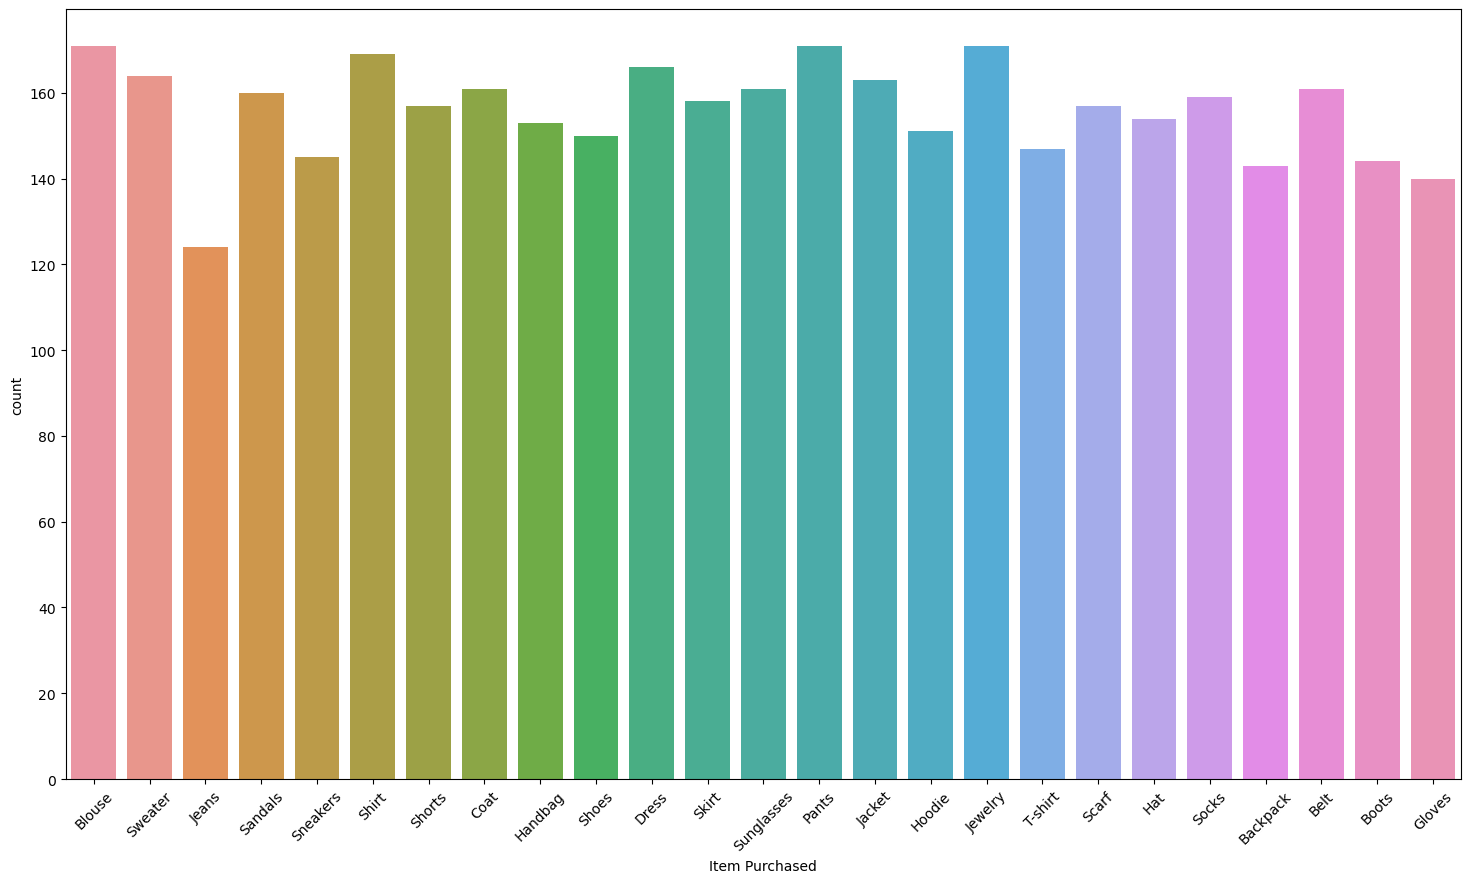

In [26]:
plt.figure(figsize=(18,10))
sns.countplot(x="Item Purchased",data=data)
plt.xticks(rotation=45)
plt.show()

In [27]:
data.groupby(["Season","Item Purchased"]).size().unstack()

Item Purchased,Backpack,Belt,Blouse,Boots,Coat,Dress,Gloves,Handbag,Hat,Hoodie,...,Scarf,Shirt,Shoes,Shorts,Skirt,Sneakers,Socks,Sunglasses,Sweater,T-shirt
Season,,,,,,,,,,,,,,,,,,,,,
Fall,34,41,42,35,34,36,37,48,50,36,...,40,39,26,35,46,31,42,39,42,39
Spring,39,41,46,40,46,43,42,36,27,36,...,41,42,40,47,46,39,40,33,52,38
Summer,45,39,43,38,42,47,29,35,37,31,...,43,38,46,40,28,36,42,37,28,30
Winter,25,40,40,31,39,40,32,34,40,48,...,33,50,38,35,38,39,35,52,42,40


In [28]:
data.groupby(["Discount Applied","Payment Method"]).size().unstack()

Payment Method,Bank Transfer,Cash,Credit Card,Debit Card,PayPal,Venmo
Discount Applied,,,,,,
0,353,387,391,347,397,348
1,259,283,280,289,280,286


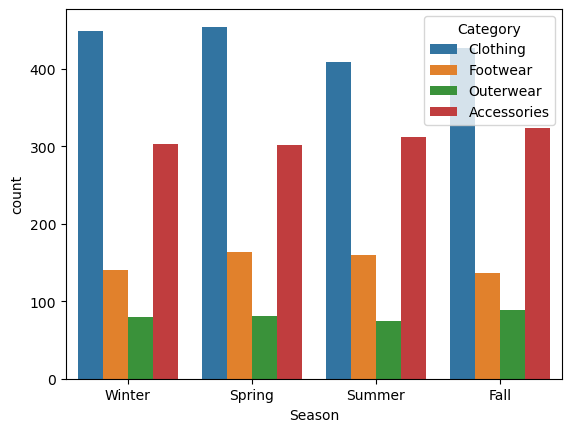

In [29]:
sns.countplot(x="Season",hue="Category",data=data)
plt.show()

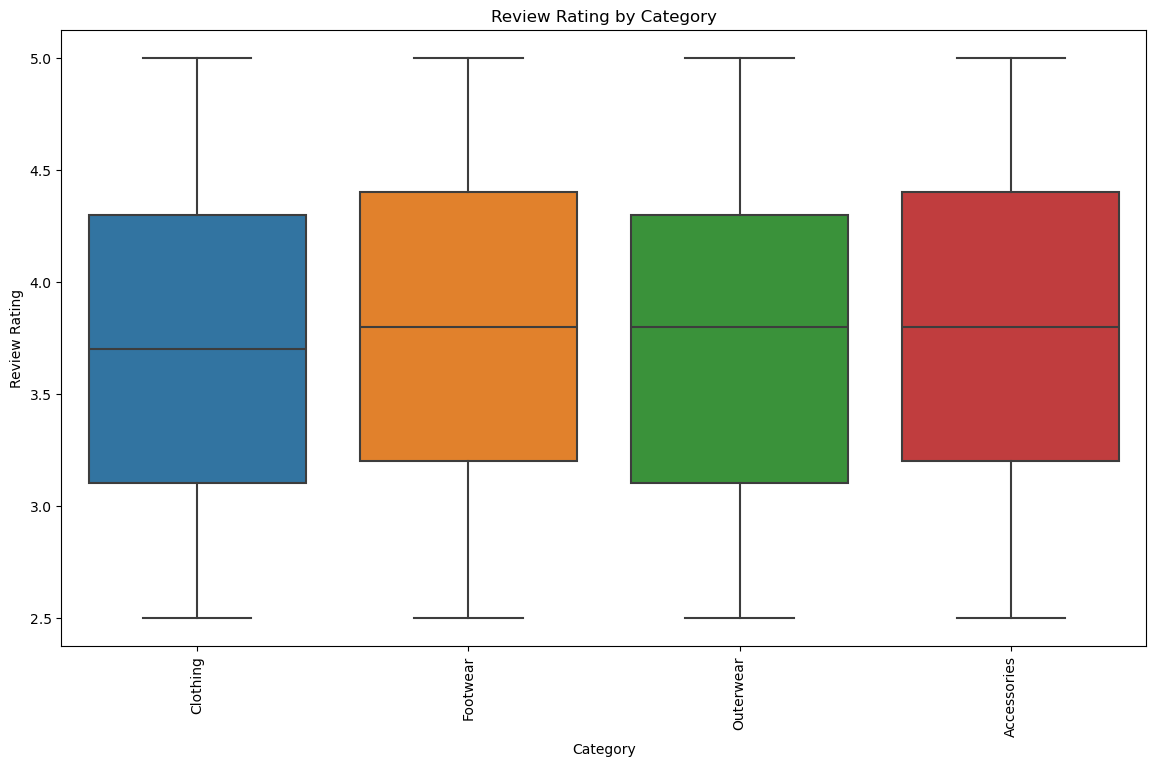

In [30]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='Category', y='Review Rating', data=data)
plt.title('Review Rating by Category')
plt.xticks(rotation=90)
plt.show()

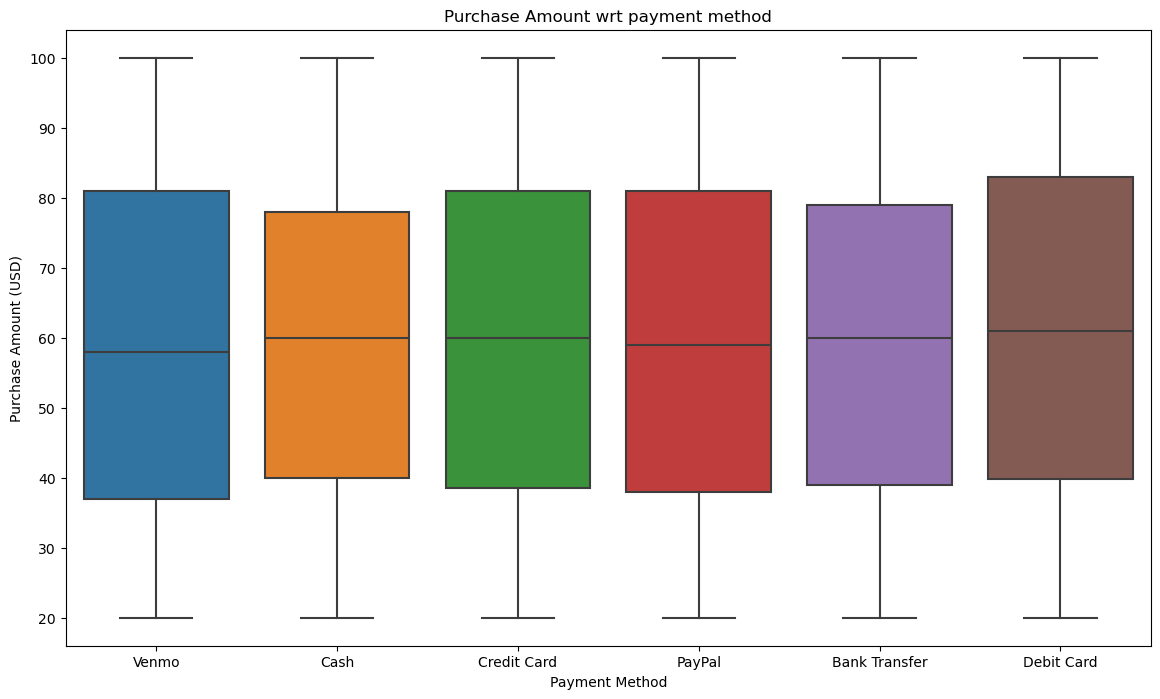

In [31]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='Payment Method', y='Purchase Amount (USD)', data=data)
plt.title('Purchase Amount wrt payment method')
plt.show()



In [32]:
data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Subscription Status
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Express,1,1,14,Venmo,Fortnightly,1
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Express,1,1,2,Cash,Fortnightly,1
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Free Shipping,1,1,23,Credit Card,Weekly,1
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Next Day Air,1,1,49,PayPal,Weekly,1
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Free Shipping,1,1,31,PayPal,Annually,1


In [33]:
data["Gender"]=data["Gender"].apply(lambda x: 1 if x == "Male" else 0)

In [34]:
selected_columns=["Gender","Discount Applied","Promo Code Used","Subscription Status"]
selected_columns

['Gender', 'Discount Applied', 'Promo Code Used', 'Subscription Status']

In [35]:
correlation_matrix=data[selected_columns].corr()
correlation_matrix

,Gender,Discount Applied,Promo Code Used,Subscription Status
Gender,1.000000,0.595823,0.595823,0.417197
Discount Applied,0.595823,1.000000,1.000000,0.700202
Promo Code Used,0.595823,1.000000,1.000000,0.700202
Subscription Status,0.417197,0.700202,0.700202,1.000000


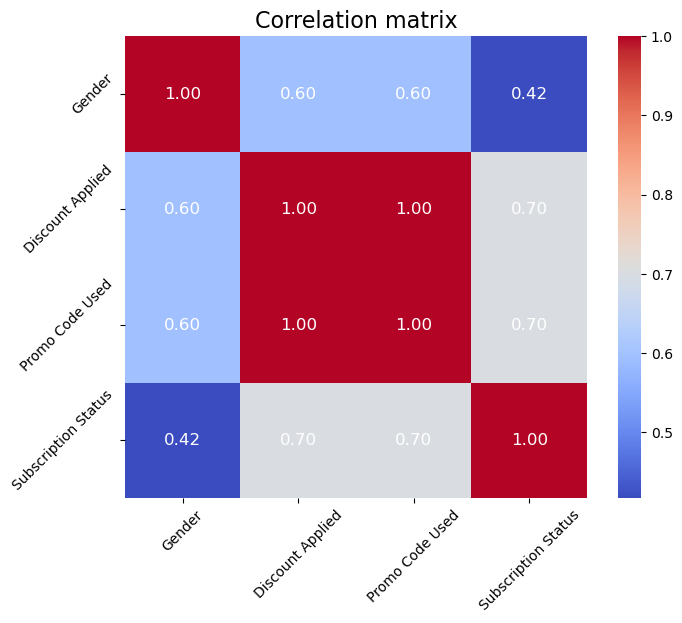

In [36]:
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix,cmap="coolwarm",square=True)
plt.title("Correlation matrix",fontsize=16)
for i in range(len(correlation_matrix)):
    for j in range(len(correlation_matrix)):
        text=f"{correlation_matrix.iloc[i,j]:.2f}"
        plt.text(j+0.5,i+0.5,text,ha="center",va="center",fontsize=12,color="white")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

## Modelling

## Preprocessing the data
### Let us work on numerical featues and categorical features

In [37]:
data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Subscription Status
0,1,55,1,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Express,1,1,14,Venmo,Fortnightly,1
1,2,19,1,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Express,1,1,2,Cash,Fortnightly,1
2,3,50,1,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Free Shipping,1,1,23,Credit Card,Weekly,1
3,4,21,1,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Next Day Air,1,1,49,PayPal,Weekly,1
4,5,45,1,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Free Shipping,1,1,31,PayPal,Annually,1


In [38]:
data.drop("Customer ID",axis=1,inplace=True)

In [39]:
x=data[["Gender","Discount Applied","Promo Code Used"]]
x

,Gender,Discount Applied,Promo Code Used
0,1,1,1
1,1,1,1
2,1,1,1
3,1,1,1
4,1,1,1
...,...,...,...
3895,0,0,0
3896,0,0,0
3897,0,0,0
3898,0,0,0


In [40]:
y=data["Subscription Status"]
y

0       1
1       1
2       1
3       1
4       1
       ..
3895    0
3896    0
3897    0
3898    0
3899    0
Name: Subscription Status, Length: 3900, dtype: int64

In [41]:
np.random.seed(42)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
models={"logistic_regression": LogisticRegression(),"random_forest_classifier":RandomForestClassifier(),"k_nearest_neighbors":KNeighborsClassifier()}
for model_name,model in models.items():
    model.fit(x_train,y_train)
    score=model.score(x_test,y_test)
    print(f"{model_name} score : {score:.4f}")

logistic_regression score : 0.8256
random_forest_classifier score : 0.8256
k_nearest_neighbors score : 0.8256


In [81]:
for model_name,model in models.items():
    cross_validation_score=cross_val_score(model,x,y,cv=5)
    mean_score=cross_validation_score.mean()*100
    std_score = cross_validation_score.std() * 100
    print(f"{model_name} cross validation score : {mean_score:.4f}% ± {std_score:.4f}%")

logistic_regression cross validation score : 84.0000% ± 1.0708%
random_forest_classifier cross validation score : 84.0000% ± 1.0708%
k_nearest_neighbors cross validation score : 84.0000% ± 1.0708%


In [82]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

# SVM Model
svm_model = SVC(kernel='linear', random_state=42)
svm_cross_val_score = cross_val_score(svm_model, x, y, cv=5)
print(f"SVM cross-validation score: {svm_cross_val_score.mean() * 100:.4f}% ± {svm_cross_val_score.std() * 100:.4f}%")


SVM cross-validation score: 84.0000% ± 1.0708%


In [83]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree Model
dt_model = DecisionTreeClassifier(random_state=42)
dt_cross_val_score = cross_val_score(dt_model, x, y, cv=5)
print(f"Decision Tree cross-validation score: {dt_cross_val_score.mean() * 100:.4f}% ± {dt_cross_val_score.std() * 100:.4f}%")


Decision Tree cross-validation score: 84.0000% ± 1.0708%


### lets bulid k mean cross validation on our models

In [45]:
for model_name,model in models.items():
    y_preds=model.predict(x_test)
    print(f"{model_name} ypreds : {y_preds}")

logistic_regression ypreds : [1 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0 1 0 1 0 0 1 0 0 0 1 1 0 0 0
 0 0 0 0 0 1 0 1 1 0 0 1 1 0 1 1 0 1 1 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0
 1 1 1 0 1 0 1 0 1 0 0 1 1 1 0 0 0 1 0 0 1 0 1 0 0 1 1 0 1 0 0 1 0 0 0 0 1
 0 1 1 1 0 0 1 0 1 1 1 0 0 1 1 0 1 0 0 0 0 1 0 1 1 0 0 1 0 1 0 0 0 1 1 0 1
 1 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 1 1 0 0 1 0 1 1 1 1 1 1
 1 0 0 1 1 0 0 1 0 1 0 1 0 1 0 0 1 1 1 0 0 0 1 1 1 1 1 1 1 0 0 0 0 1 0 0 1
 0 1 0 0 1 0 0 1 0 1 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 0 1 0 1 1 0 0 1 0 0 0 1
 0 0 1 0 1 0 1 1 1 0 1 1 0 0 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 1 0 1 0 1
 0 1 1 0 0 0 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 1 0 1 1 0 0 1 0 0 0 1 1 1 1 0 1
 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 0 1 1 0 0 1 1 0 1 1 1 0 0 0
 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 1 1 0 1 1 0 1 1 0 1 0 1 1
 1 0 1 1 0 0 1 1 0 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 1 0 1 0 1 0 0 0 0 1 1 0
 0 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 1 1 0 0 0 

In [46]:
svm_model.fit(x_train,y_train)
svm_model.score(x_test,y_test)

0.8256410256410256

In [47]:
y_preds_svm=svm_model.predict(x_test)
y_preds_svm

array([1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,

## Experimentation

## Let us work with RandomForestClassifier

### Hyperparameter tuning

The hyperparameter we are looking to adjust are:
1. max_depth
2. max_features
3. min_samples_leaf
4. min_samples_split
5. n_estimators

In [48]:
random_forest_model=RandomForestClassifier()
random_forest_model.fit(x_train,y_train)
random_forest_model.score(x_test,y_test)

0.8256410256410256

In [49]:
y_preds=random_forest_model.predict(x_test)
y_preds

array([1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,

In [50]:
def evaluate_preds(y_true,y_preds):
    accuracy=     accuracy_score(y_true,y_preds)
    precision=    precision_score(y_true,y_preds)
    recall=       recall_score(y_true,y_preds)
    f1=           f1_score(y_true,y_preds)
    metric_dict={"accuracy":    round(accuracy,2),
                 "precision":   round(precision,2),
                 "recall" :     round(recall,2),
                 "f1" :         round(f1,2)}
    print(f"acc:{accuracy*100:.2f}%")
    print(f"pre:{precision*100:.2f}%")
    print(f"rec:{recall*100:.2f}%")
    print(f"f1:{f1*100:.2f}%")
    return metric_dict


In [51]:
data

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Subscription Status
0,55,1,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Express,1,1,14,Venmo,Fortnightly,1
1,19,1,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Express,1,1,2,Cash,Fortnightly,1
2,50,1,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Free Shipping,1,1,23,Credit Card,Weekly,1
3,21,1,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Next Day Air,1,1,49,PayPal,Weekly,1
4,45,1,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Free Shipping,1,1,31,PayPal,Annually,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,40,0,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,2-Day Shipping,0,0,32,Venmo,Weekly,0
3896,52,0,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,Store Pickup,0,0,41,Bank Transfer,Bi-Weekly,0
3897,46,0,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,Standard,0,0,24,Venmo,Quarterly,0
3898,44,0,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,Express,0,0,24,Venmo,Weekly,0


In [52]:
selected_columns=["Gender","Discount Applied","Promo Code Used","Subscription Status"]

In [53]:
data_filtered=data[selected_columns]
data_filtered

,Gender,Discount Applied,Promo Code Used,Subscription Status
0,1,1,1,1
1,1,1,1,1
2,1,1,1,1
3,1,1,1,1
4,1,1,1,1
...,...,...,...,...
3895,0,0,0,0
3896,0,0,0,0
3897,0,0,0,0
3898,0,0,0,0


In [54]:
np.random.seed(42)
data_shuffled = data_filtered.sample(frac=1)
x=data_shuffled.drop("Subscription Status",axis=1)
y=data_shuffled["Subscription Status"]
train_split=round(0.7*len(data_shuffled))
valid_split=round(train_split+0.15*len(data_shuffled))
x_train,y_train = x[:train_split],y[:train_split]
x_valid,y_valid = x[train_split:valid_split],y[train_split:valid_split]
x_test , y_test = x[valid_split:], y[valid_split:]

In [55]:
len(data)

3900

In [56]:
print("total_length : ", (len(data_shuffled)))
print("train_data_length : ", len(x_train))
print("valid_data_length : ", len(x_valid))
print("test_data_length : ", len(x_test))

total_length :  3900
train_data_length :  2730
valid_data_length :  585
test_data_length :  585


In [57]:
print("train_data_length:" ,2730/3900)
print("valid_data_length:" ,585/3900)
print("test_data_length:" ,585/3900)

train_data_length: 0.7
valid_data_length: 0.15
test_data_length: 0.15


In [58]:
model=RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [59]:
y_preds=model.predict(x_valid)
y_preds

array([1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,

In [60]:
baseline_metrics=evaluate_preds(y_valid,y_preds)
baseline_metrics

acc:84.10%
pre:63.67%
rec:100.00%
f1:77.80%


{'accuracy': 0.84, 'precision': 0.64, 'recall': 1.0, 'f1': 0.78}

In [61]:
print("Unique values in y_valid:", set(y_valid))
print("Unique values in y_preds:", set(y_preds))


Unique values in y_valid: {0, 1}
Unique values in y_preds: {0, 1}


In [62]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_valid, y_preds)
print("Confusion Matrix:\n", conf_matrix)



Confusion Matrix:
 [[329  93]
 [  0 163]]


In [63]:
model_2=RandomForestClassifier(n_estimators=100)
model_2.fit(x_train,y_train)


RandomForestClassifier()

In [64]:
y_preds_2=model_2.predict(x_valid)
y_preds_2

array([1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,

In [65]:
model_2_metrics=evaluate_preds(y_valid,y_preds_2)
model_2_metrics

acc:84.10%
pre:63.67%
rec:100.00%
f1:77.80%


{'accuracy': 0.84, 'precision': 0.64, 'recall': 1.0, 'f1': 0.78}

In [66]:
model_3=RandomForestClassifier(n_estimators=100,max_depth=10)
model_3
model_3.fit(x_train,y_train)

RandomForestClassifier(max_depth=10)

In [67]:
y_preds_3=model_3.predict(x_valid)
y_preds_3

array([1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,

In [68]:
model_3_metrics=evaluate_preds(y_valid,y_preds_3)
model_3_metrics

acc:84.10%
pre:63.67%
rec:100.00%
f1:77.80%


{'accuracy': 0.84, 'precision': 0.64, 'recall': 1.0, 'f1': 0.78}

#### Hyperparameters turing with Randomized searchCV

In [69]:
from sklearn.model_selection import RandomizedSearchCV
grid={"n_estimators": [10,100,200,500,1000,2000],
      "max_depth" : [None,5,10,20,30],
      "max_features" : ["auto","sqrt"],
      "min_samples_leaf" : [1,2,4],
      "min_samples_split" : [2,4,6]}
x=data_shuffled.drop("Subscription Status",axis=1)
y=data_shuffled["Subscription Status"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
model=RandomForestClassifier(n_jobs=1)
#setup randomized search CV

rs_model=RandomizedSearchCV(estimator=model,param_distributions=grid,n_iter=10,cv=5,verbose=2)

In [70]:
rs_model.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=2000; total time=   6.9s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=2000; total time=   6.9s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=2000; total time=   7.2s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=2000; total time=   6.9s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=2000; total time=   6.8s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.7s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_est

C:\Users\91950\Desktop\sample_project1\env\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\91950\Desktop\sample_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91950\Desktop\sample_project1\env\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\91950\Desktop\sample_project1\env\lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_pa

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 2000]},
                   verbose=2)

In [71]:
rs_model.best_params_

{'n_estimators': 2000,
 'min_samples_split': 6,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 30}

In [72]:
rs_model_y_preds=rs_model.predict(x_valid)
rs_model_y_preds

array([1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,

In [73]:
rs_model_metrics=evaluate_preds(y_valid,rs_model_y_preds)
rs_model_metrics

acc:84.10%
pre:63.67%
rec:100.00%
f1:77.80%


{'accuracy': 0.84, 'precision': 0.64, 'recall': 1.0, 'f1': 0.78}

#### Hyperparameters turing with GridSearchCV

In [74]:
grid_2={"n_estimators":[10],
        "min_samples_split" : [4,6],
        "min_samples_leaf" : [1,2,4],
        "max_features" : ["auto","sqrt"],
        "max_depth" : [None] }


In [75]:
x=data_shuffled.drop("Subscription Status",axis=1)
y=data_shuffled["Subscription Status"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
model=RandomForestClassifier(n_jobs=1)
gs_model=GridSearchCV(estimator=model,param_grid=grid_2,cv=5,verbose=2)
gs_model.fit(x_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estim

C:\Users\91950\Desktop\sample_project1\env\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\91950\Desktop\sample_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91950\Desktop\sample_project1\env\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\91950\Desktop\sample_project1\env\lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_pa

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
             param_grid={'max_depth': [None], 'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [4, 6], 'n_estimators': [10]},
             verbose=2)

In [76]:
gs_model.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 10}

In [77]:
gs_model_y_preds=gs_model.predict(x_test)
gs_model_y_preds

array([0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,

In [78]:
gs_model_metrics=evaluate_preds(y_test,gs_model_y_preds)
gs_model_metrics

acc:85.00%
pre:65.99%
rec:100.00%
f1:79.51%


{'accuracy': 0.85, 'precision': 0.66, 'recall': 1.0, 'f1': 0.8}

In [79]:
models_comparing=pd.DataFrame({"baseline":baseline_metrics,"model_2":model_2_metrics,"model_3":model_3_metrics,"rs_model":rs_model_metrics,"gs_model":gs_model_metrics})
models_comparing

,baseline,model_2,model_3,rs_model,gs_model
accuracy,0.84,0.84,0.84,0.84,0.85
precision,0.64,0.64,0.64,0.64,0.66
recall,1.00,1.00,1.00,1.00,1.00
f1,0.78,0.78,0.78,0.78,0.80


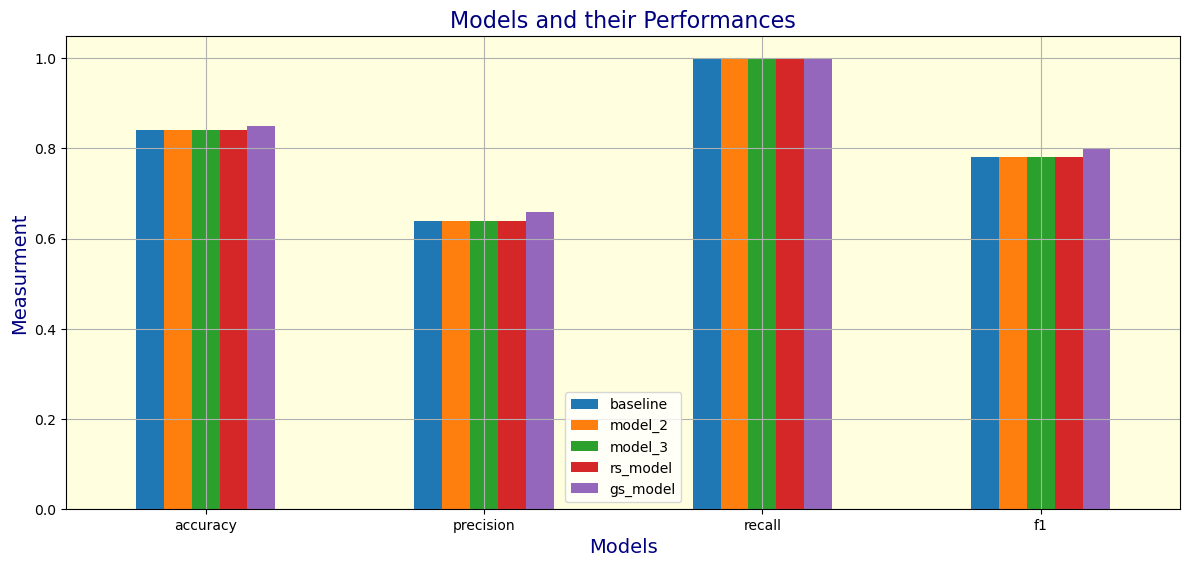

In [80]:
models_comparing.plot(kind="bar",figsize=(12,6))
plt.legend()
plt.grid()
plt.xlabel("Models",fontsize=14,color="navy")
plt.ylabel("Measurment",fontsize=14,color="navy")
plt.gca().set_facecolor("lightyellow")
plt.tight_layout()
plt.xticks(rotation=0,color="black",fontsize=10)
plt.title("Models and their Performances",fontsize=16,color="navy")
plt.show()